# Estadística básica con Numpy

En esta sesión analizaremos elementos básicos de estadística con **Numpy**.

`NumPy` es el paquete fundamental para la computación científica en Python. Según Wikipedia, NumPy es una biblioteca para el lenguaje de programación Python que da soporte para crear vectores y matrices grandes multidimensionales, junto con una gran colección de funciones matemáticas de alto nivel para operar con ellas.

La documentación de la biblioteca puede consultarse [aquí](https://numpy.org/).
W3Schools ofrece también un excelente sitio de referencia sobre la biblioteca, puedes consultarlo [aquí](https://www.w3schools.com/python/numpy/).

In [ ]:
#Para instalar Numpy usar el siguiente código. No es necesario en Google Colab
!pip install numpy

In [1]:
!ls

sample_data/


In [2]:
import numpy as np   #Operaciones con matrices de datos
import pandas as pd #Trabajando con datos
import matplotlib.pyplot as plt # Visualización de datos
import seaborn as sns # Visualización de datos

En esta sesión cubriremos los siguientes conceptos de estadística:

1. Media
2. Mediana
3. Percentiles
4. Rango intercuartil
5. Valores atípicos
6. Desviación estándar

## Cargando el dataset
Utilizaremos el dataset de la información del Titanic.

In [10]:
!wget --no-check-certificate https://catalabs.mx/datasets/titanic.csv -O titanic.csv

--2024-05-04 16:54:31--  https://catalabs.mx/datasets/titanic.csv
Resolving catalabs.mx (catalabs.mx)... 174.136.30.149
Connecting to catalabs.mx (catalabs.mx)|174.136.30.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/csv]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  58.89K  --.-KB/s    in 0.06s   

2024-05-04 16:54:31 (1009 KB/s) - ‘titanic.csv’ saved [60302/60302]



In [4]:
df_titanic = pd.read_csv('titanic.csv') #Creamos el dataframe

## Explorando el Dataset

In [8]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Analizando los datos

In [9]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df_titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [14]:
print(29.7+3*14.52)

73.26


Text(0, 0.5, 'Edad')

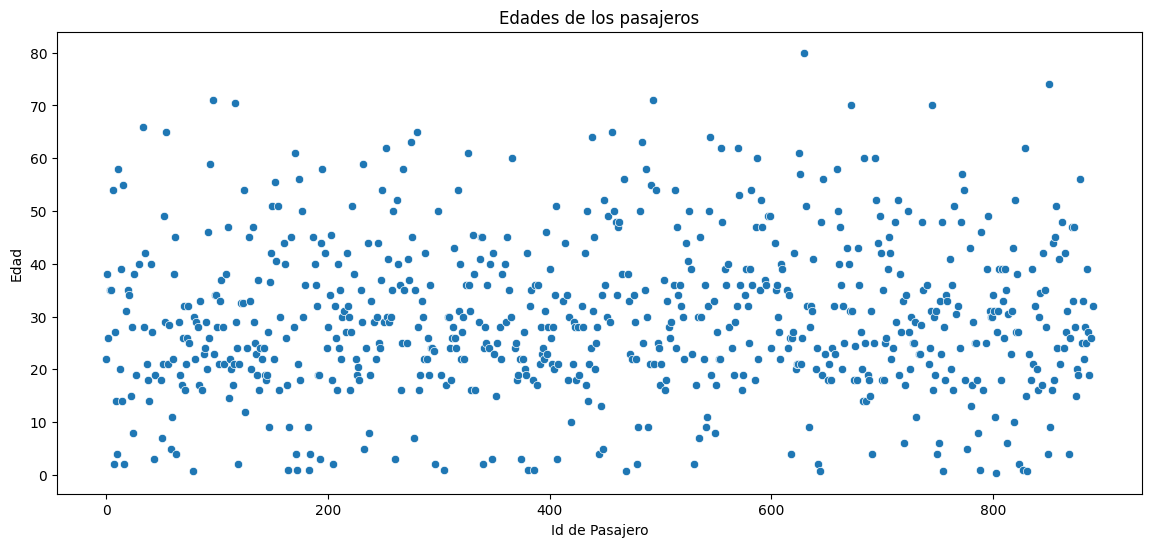

In [15]:
# Fija el ancho y alto de la figura
plt.figure(figsize=(14,6))
# Agrega título
plt.title("Edades de los pasajeros")
#sns.lineplot(data=df_titanic.Age)
sns.scatterplot(data=df_titanic.Age)
plt.xlabel("Id de Pasajero")
plt.ylabel("Edad")

<Axes: ylabel='Age'>

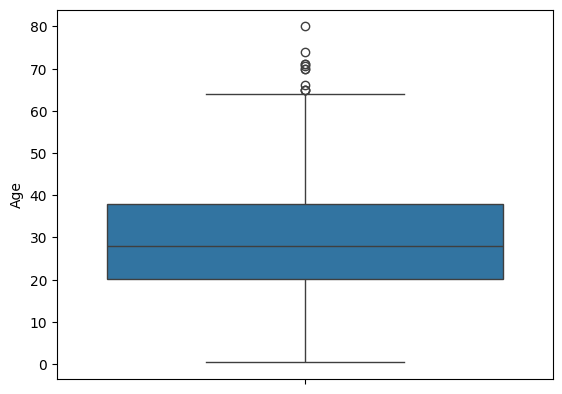

In [16]:
sns.boxplot(data=df_titanic.Age)

### Histogramas

Cuando analizamos por primera vez un conjunto de datos, queremos ser capaces de entender rápidamente ciertas cosas sobre él:

- ¿Existen algunos valores más frecuentes que otros?
- ¿Cuál es el rango del conjunto de datos (es decir, los valores mínimos y máximos)?
- ¿Hay muchos valores atípicos?

Podemos visualizar esta información mediante un gráfico llamado histograma.

<Axes: xlabel='Age', ylabel='Count'>

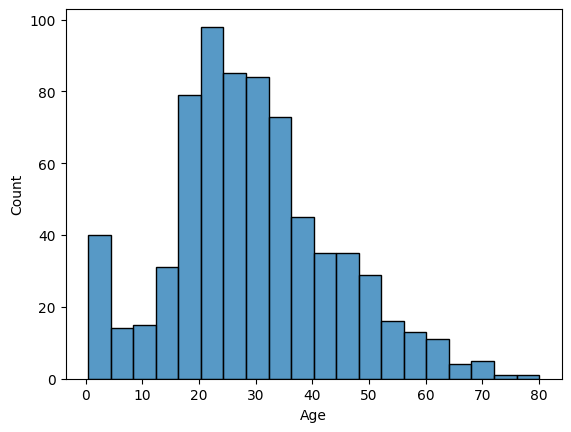

In [17]:
sns.histplot(x=df_titanic.Age)

<Axes: xlabel='Pclass', ylabel='Age'>

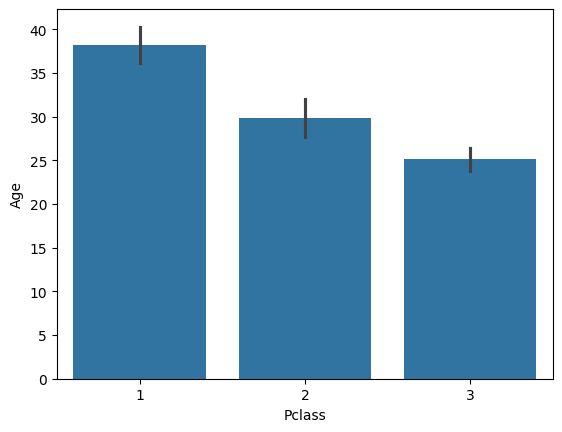

In [18]:
sns.barplot(x=df_titanic.Pclass, y=df_titanic.Age)

Para empezar, analizaremos conjuntos de datos de una sola variable. Una forma de pensar en un conjunto de datos de una sola variable es que contiene respuestas a una pregunta. Por ejemplo, podemos preguntar a 100 personas: "¿Cuánto años tienes?". Las edades formarían nuestro conjunto de datos. Obtengamos entonces la columna de las edades de los pasajeros del Titanic:

In [19]:
edades = df_titanic.Age
edades.head(20)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17     NaN
18    31.0
19     NaN
Name: Age, dtype: float64

En la salida anterior podemos observar algunos valores con la leyenda NaN (Not a Number) eso indica la ausencia de datos (dato nulo) en Python.

In [20]:
#Revisamos la forma del dataframe. shape nos indica el número de renglones y columnas del conjunto de datos.
df_titanic.shape

(891, 12)

In [25]:
edades.shape

(714,)

### Eliminamos valores nulos

In [23]:
edades = edades.dropna()

In [24]:
edades.head(20)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
18    31.0
20    35.0
21    34.0
22    15.0
Name: Age, dtype: float64

Convertimos el Dataframe resultante a un arreglo de Numpy para trabajar con él.

In [26]:
pasajeros_edades = edades.to_numpy()

In [27]:
print(pasajeros_edades[0:40])

[22. 38. 26. 35. 35. 54.  2. 27. 14.  4. 58. 20. 39. 14. 55.  2. 31. 35.
 34. 15. 28.  8. 38. 19. 40. 66. 28. 42. 21. 18. 14. 40. 27.  3. 19. 18.
  7. 21. 49. 29.]


#### La media (mean)

El primer concepto estadístico que exploraremos es la media, también llamada comúnmente promedio. La media es una medida útil para obtener el centro de un conjunto de datos. NumPy tiene una función incorporada para calcular el promedio o la media de las matrices: `np.mean`

In [29]:
edad_promedio = np.mean(pasajeros_edades)
desviacion_std = np.std(pasajeros_edades)
print(f"Edad promedio de los pasajeros: {round(edad_promedio,2)}")
print(f"Desviación estándar: {round(desviacion_std,2)}")

Edad promedio de los pasajeros: 29.7
Desviación estándar: 14.52


### La media y operaciones lógicas

También podemos utilizar `np.mean` para calcular el porcentaje de elementos del array que tienen una determinada propiedad.

Como sabemos, un operador lógico evaluará cada elemento de un array para ver si coincide con la condición especificada. Si el elemento coincide con la condición dada, el elemento se evaluará como True y será igual a 1. Si no coincide, será Falso e igual a 0.

Cuando `np.mean` calcula una sentencia lógica, el valor medio resultante será equivalente al número total de elementos Verdaderos dividido por la longitud total de la matriz.

### Calcular el porcentaje de personas menores o con 21 años.

In [30]:
porc_menores_a_21 = np.mean(pasajeros_edades < 21)
print(f"Porcentaje de pasajeros menores de edad: {porc_menores_a_21*100}%")

Porcentaje de pasajeros menores de edad: 25.210084033613445%


In [34]:
porc_menores_a_10 = np.mean(pasajeros_edades < 10)
print(porc_menores_a_10)

0.03081232492997199


### Calcular el porcentaje de personas entre 20 y 40 años inclusive.

**Método 1**. Obtenemos los porcentajes de menores a 41 años y el de menores a 20 años, la diferencia es el valor buscado:

In [35]:
porc_menores_a_20 = np.mean(pasajeros_edades < 20)
porc_menores_a_41 = np.mean(pasajeros_edades < 41)

print(f"Menores a 20: {porc_menores_a_20}")
print(f"Menores a 41: {porc_menores_a_41}")

porc_entre_20y40_inclusive = porc_menores_a_41 - porc_menores_a_20

print(f"Porcentaje de personas entre 20 y 40 años inclusive: {porc_entre_20y40_inclusive}")


Menores a 20: 0.22969187675070027
Menores a 41: 0.7927170868347339
Porcentaje de personas entre 20 y 40 años inclusive: 0.5630252100840336


**Método 2**. Obtenemos los porcentajes de menores a 20 años y el de mayores de 40 años, restamos ambos valores al 100% y ese es el valor buscado:

In [36]:
porc_menores_a_20 = np.mean(pasajeros_edades < 20)
porc_mayores_a_40 = np.mean(pasajeros_edades >= 41)
print(f"Menores a 20: {porc_menores_a_20}")
print(f"Mayores a 40: {porc_mayores_a_40}")
print(f"Con 20 años o más: {1 - porc_menores_a_20}")
print(f"Porcentaje de personas entre 20 y 40 años inclusive: {1 - porc_menores_a_20 - porc_mayores_a_40}")

Menores a 20: 0.22969187675070027
Mayores a 40: 0.20728291316526612
Con 20 años o más: 0.7703081232492998
Porcentaje de personas entre 20 y 40 años inclusive: 0.5630252100840336


**Método 3**. Utilizamos la función `bitwise_and` de Numpy para aplicar las condiciones requeridas a los datos.

In [37]:
np.mean(np.bitwise_and(pasajeros_edades>=20,pasajeros_edades<41))

0.5630252100840336

### Cálculo de la media de matrices 2D
Si tenemos una matriz bidimensional, `np.mean` puede calcular la media de la matriz mayor así como los valores interiores.
Crearemos ahora una matriz bidemensional que contenga las edades y el dato de si el pasajero sobrevivió o no.

In [38]:
edades_sobrevivientes = df_titanic[["Age","Survived"]]
edades_sobrevivientes = edades_sobrevivientes.dropna()

In [39]:
edades_sobrevivientes.head()

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


Convertimos los datos a un arreglo de Numpy:

In [40]:
edades_sobrevivientes_array = edades_sobrevivientes.to_numpy()
print(len(edades_sobrevivientes_array))
print(edades_sobrevivientes_array[:30])

714
[[22.  0.]
 [38.  1.]
 [26.  1.]
 [35.  1.]
 [35.  0.]
 [54.  0.]
 [ 2.  0.]
 [27.  1.]
 [14.  1.]
 [ 4.  1.]
 [58.  1.]
 [20.  0.]
 [39.  0.]
 [14.  0.]
 [55.  1.]
 [ 2.  0.]
 [31.  0.]
 [35.  0.]
 [34.  1.]
 [15.  1.]
 [28.  1.]
 [ 8.  0.]
 [38.  1.]
 [19.  0.]
 [40.  0.]
 [66.  0.]
 [28.  0.]
 [42.  0.]
 [21.  0.]
 [18.  0.]]


Realizamos la transposición de los datos, para convertir los valores en columna a valores en renglón:

In [41]:
edades_sobrevivientes_array = edades_sobrevivientes_array.transpose()
print(edades_sobrevivientes_array)

[[22. 38. 26. ... 19. 26. 32.]
 [ 0.  1.  1. ...  1.  1.  0.]]


Si calculamos la media de toda la matriz no tendríamos un dato útil. Por lo anterior, vamos a indicarle a Numpy que deseamos que calcule las medias de los datos de cada renglón. Esto lo realizaremos indicando el parámetro `axis=1`.

In [43]:
np.mean(edades_sobrevivientes_array,axis=1)

15.052640056022408

### Datos atípicos

Como podemos ver, la media es una forma útil de entender rápidamente las diferentes partes de nuestros datos. Sin embargo, la media está muy influenciada por los valores específicos de nuestro conjunto de datos. ¿Qué ocurre cuando uno de esos valores es significativamente diferente del resto?

Los valores que no se ajustan a la mayoría de un conjunto de datos se conocen como valores atípicos. Es importante identificar los valores atípicos porque, si pasan desapercibidos, pueden sesgar nuestros datos y provocar errores en nuestro análisis (como la determinación de la media). También pueden ser útiles para señalar errores en la recolección de datos.

Cuando somos capaces de identificar los valores atípicos, podemos determinar si se deben a un error en la recogida de la muestra o si representan o no una desviación significativa pero real de la media.

Imaginemos que tenemos los datos de las calificaciones de los alumnos de un grupo de matemáticas:

`[90,95,93,98,94,160]`

En este caso, es claro que 160 es un dato atípico, que probablemente se debe a un error de captura.

#### Ordenamiento y datos atípicos
Una forma de identificar rápidamente los valores atípicos es ordenando nuestros datos, una vez que nuestros datos están ordenados, podemos echar un vistazo rápidamente al principio o al final de una matriz para ver si algunos valores se encuentran más allá del rango esperado. Podemos utilizar la función NumPy `np.sort` para ordenar nuestros datos.

In [44]:
pasajeros_edades = pasajeros_edades.transpose()
pasajeros_edades_ordenados = np.sort(pasajeros_edades)
print(pasajeros_edades_ordenados)

[ 0.42  0.67  0.75  0.75  0.83  0.83  0.92  1.    1.    1.    1.    1.
  1.    1.    2.    2.    2.    2.    2.    2.    2.    2.    2.    2.
  3.    3.    3.    3.    3.    3.    4.    4.    4.    4.    4.    4.
  4.    4.    4.    4.    5.    5.    5.    5.    6.    6.    6.    7.
  7.    7.    8.    8.    8.    8.    9.    9.    9.    9.    9.    9.
  9.    9.   10.   10.   11.   11.   11.   11.   12.   13.   13.   14.
 14.   14.   14.   14.   14.   14.5  15.   15.   15.   15.   15.   16.
 16.   16.   16.   16.   16.   16.   16.   16.   16.   16.   16.   16.
 16.   16.   16.   16.   17.   17.   17.   17.   17.   17.   17.   17.
 17.   17.   17.   17.   17.   18.   18.   18.   18.   18.   18.   18.
 18.   18.   18.   18.   18.   18.   18.   18.   18.   18.   18.   18.
 18.   18.   18.   18.   18.   18.   18.   19.   19.   19.   19.   19.
 19.   19.   19.   19.   19.   19.   19.   19.   19.   19.   19.   19.
 19.   19.   19.   19.   19.   19.   19.   19.   20.   20.   20.   20.
 20.  

In [45]:
media = np.mean(pasajeros_edades)
mediana = np.median(pasajeros_edades)
print(f"La media de las edades es: {media}")
print(f"La mediana de las edades es: {mediana}")

La media de las edades es: 29.69911764705882
La mediana de las edades es: 28.0


In [46]:
lista_calificaciones = [96, 97, 98, 99, 100, 90, 140]
calificaciones = np.array(lista_calificaciones)

In [47]:
print(np.mean(calificaciones))

102.85714285714286


In [48]:
print(np.median(calificaciones))

98.0


### Percentiles

El percentil es una medida de posición usada en estadística que indica, una vez ordenados los datos de menor a mayor, el valor de la variable por debajo del cual se encuentra un porcentaje dado de observaciones en un grupo. Por ejemplo, el percentil 25 es el valor bajo el cual se encuentran el 25 % de las observaciones, y el 75 % restante son mayores.

In [ ]:
print(f"El percentil 90 de las edades es: {np.percentile(pasajeros_edades,90)}")
print(f"El percentil 5 de las edades es: {np.percentile(pasajeros_edades,5)}")

Algunos percentiles tienen nombres específicos:

- El percentil 25 se llama primer cuartil
- El percentil 50 se llama mediana
- El percentil 75 se llama tercer cuartil

El mínimo, el primer cuartil, la mediana, el tercer cuartil y el máximo de un conjunto de datos se denominan resumen de cinco números. Calcular este conjunto de números es muy útil cuando obtenemos un nuevo conjunto de datos.

La diferencia entre el primer y el tercer cuartil es un valor llamado rango intercuartil.

In [49]:
primer_cuartil = np.percentile(pasajeros_edades,25)
tercer_cuartil = np.percentile(pasajeros_edades,75)
rango_intercuartil = tercer_cuartil - primer_cuartil
print(f"Primer cuartil: {primer_cuartil}")
print(f"Tercer cuartil: {tercer_cuartil}")
print(f"Rango intercuartil: {rango_intercuartil}")

Primer cuartil: 20.125
Tercer cuartil: 38.0
Rango intercuartil: 17.875


El 50% del conjunto de datos estará dentro del rango intercuartil. El rango intercuartil nos da una idea de la dispersión de nuestros datos. Cuanto menor sea el valor del rango intercuartílico, menor será la varianza de nuestro conjunto de datos. Cuanto mayor sea el valor, mayor será la varianza.

### Numpy y la desviación estándar

Si bien la media y la mediana pueden informarnos sobre el centro de nuestros datos, no reflejan el rango o la variación de los mismos. Ahí es donde entra la desviación estándar.

Al igual que el rango intercuartil, la desviación estándar nos indica la dispersión de los datos. Cuanto mayor sea la desviación estándar, más separados estarán los datos del centro. Cuanto menor sea la desviación estándar, más se agrupan los datos en torno a la media.

Podemos usar la función `np.std()` para calcular la desviación estándar de un conjunto de datos.

In [50]:
desviacion_estandar = np.std(pasajeros_edades)

print(f"La media es: {np.mean(pasajeros_edades)}")
print(f"La desviación estándar es: {desviacion_estandar}")

La media es: 29.69911764705882
La desviación estándar es: 14.516321150817316
